# Analysis of Crime rate in San Francisco 

### Content
+ Introduction: Crime rate in San Francisco
+ Data description and objectives
+ Data acquisiton and manipulation 
+ Data analysis and visualization 
+ Conclusion

## 1.Introduction: Crime Rate in San Francisco

San Francisco is a very large coastal city (i.e. on the ocean, a bay, or inlet) located in the state of California. With a population of 883,305 people and 198 constituent neighborhoods, San Francisco is the fourth largest community in California. 

With a crime rate of 64 per one thousand residents, San Francisco has one of the highest crime rates in America compared to all communities of all sizes - from the smallest towns to the very largest cities. One's chance of becoming a victim of either violent or property crime here is one in 16. Within California, more than 99% of the communities have a lower crime rate than San Francisco.

The overall crime rate in San Francisco is 151% higher than the national average.
For every 100,000 people, there are 18.86 daily crimes that occur in San Francisco.
San Francisco is safer than 5% of the cities in the United States.
The number of total year over year crimes in San Francisco has not changed.

Source(https://www.neighborhoodscout.com/ca/san-francisco/crime)

## 2.Data description and objectives

According to gleaned description San Francisco has by far the highest property crime rate in California, with more than twice the number of reported thefts per capita than Los Angeles or Santa Clara counties. It is quite interesting to recieve more information about San Francisco in terms of law-breaking for citizens as well as for city tourists.

The number of total year over year crimes in San Francisco has not changed. That is why Analysis of the data is based on the Police Department records of year 2016. Unfortunately there is information about crime only, nothing about criminal because of Privacy Policy.

The list below represents data,on which I will work, from the dataset:

+ Category- section of committed crime
+ Description - the way how law was breaked
+ Day of week - day of Week when the crime happened
+ Date - exact day when crime was comitted
+ Time - exact time when crime was committed
+ Disctrict - the neighborhood in San Francisco
+ Resolution - kind of Punishment given to the criminal to resolve the case
+ Address - address where the crime scene happened
+ X - latitude of the crime Location
+ Y - longitude of the Crime Location
+ Location - exact Location coordinates

The aim of the project is answer questions by building graphs and analyzing them in visualization and analysis part.

Project questions:
+ Identify categories of breaked laws which are most common
+ Find District vs category of crime
+ Show Density of crime rate in map
+ Figure out top addresses where law-breaking happened most
+ Identify crime rate in each month
+ Find Distribution of crime over the day/week
+ 



## 3. Data acquisiton and manipulation 

### 3.1. Data acquisiton: Dataset from Kaggle.com

This Problem Data set contains information about the law-breaking in San Francisco, which was came from the Crime Data Warehouse, a reliable data system maintained by the Police Department. So, in order to work with the data set, first we have to download file with comma separated values, then use appropriate pandas functions to read the data.

In [378]:
# for operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [379]:
#reading the dataset
data = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [380]:
data.head(6)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134


### 3.2. Data manipulation: cleaning and shaping

In this step, we do following manipulations:
+ Inconsistent column names 
+ Dropping unnecessary columns
+ Missing data
+ Different data types
+ Duplicated rows
+ Data Shaping


#### Inconsistent column names

In [381]:
#check the column names and their data type
data.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [382]:
#change the case to upper
data.columns=data.columns.str.upper()
data.columns

Index(['INCIDNTNUM', 'CATEGORY', 'DESCRIPT', 'DAYOFWEEK', 'DATE', 'TIME',
       'PDDISTRICT', 'RESOLUTION', 'ADDRESS', 'X', 'Y', 'LOCATION', 'PDID'],
      dtype='object')

In [383]:
#rename columns 
data.rename(columns={'PDDISTRICT':'DISTRICT','DAYOFWEEK':'DAY OF WEEK'},inplace = True);
data.head()

,INCIDNTNUM,CATEGORY,DESCRIPT,DAY OF WEEK,DATE,TIME,DISTRICT,RESOLUTION,ADDRESS,X,Y,LOCATION,PDID
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Most column names are understandable, excepting colmns containing data about District and Day of week. So, in order to avoid case-sensitive situations or unappropriate column name issues it is important to rename columns and change the case to upper.

#### Dropping unnecessary columns

The last column, called police department id(PDID), will not be obliging and helpful in analysis. That is why we delete this column from the dataframe.

In [384]:
data.drop(columns=['PDID'],inplace = True);
data

,INCIDNTNUM,CATEGORY,DESCRIPT,DAY OF WEEK,DATE,TIME,DISTRICT,RESOLUTION,ADDRESS,X,Y,LOCATION
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)"
...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)"
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)"
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)"
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)"


#### Missing data

In [385]:
#checking for the missing data
#false means no missing data  
data.isnull().any()

INCIDNTNUM     False
CATEGORY       False
DESCRIPT       False
DAY OF WEEK    False
DATE           False
TIME           False
DISTRICT        True
RESOLUTION     False
ADDRESS        False
X              False
Y              False
LOCATION       False
dtype: bool

In [386]:
#columns with total row numbers, which are not empty 
data1 = pd.DataFrame()
data1["Columns"] = list(data.columns)
data1["Count"] = list(data.count())

data1

,Columns,Count
0,INCIDNTNUM,150500
1,CATEGORY,150500
2,DESCRIPT,150500
3,DAY OF WEEK,150500
4,DATE,150500
5,TIME,150500
6,DISTRICT,150499
7,RESOLUTION,150500
8,ADDRESS,150500
9,X,150500


As we can see, almost all columns have full data besides District column.

In [387]:
#total number of missed values
data.isnull().sum().sum()

1

The amount of the missed data is only 1 value about Disctrict. It will not play a big role in the analysis, that is why we can just drop this row to which the missed value belongs.

In [388]:
#deleting rows with NaN values
data = data.dropna()

In [389]:
#checking number of missed value after getting rid/replacing 
data.isnull().sum().sum()

0

After dropping missed value there are 150499 rows of info about crime incidents.

#### Duplicated data

In [390]:
#checking for duplicated data
#shows total number of duplicated data
data.duplicated().sum()

14

14 rows out of 150499 are duplicated. Below we can see dupliacted rows.

In [391]:
#retrieve all duplicated rows 
data.loc[data.duplicated(),:]

,INCIDNTNUM,CATEGORY,DESCRIPT,DAY OF WEEK,DATE,TIME,DISTRICT,RESOLUTION,ADDRESS,X,Y,LOCATION
6820,160251254,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,03/26/2016 12:00:00 AM,16:59,SOUTHERN,JUVENILE BOOKED,800 Block of MARKET ST,-122.407634,37.784189,"(37.7841893501425, -122.407633520742)"
25853,160112361,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,02/07/2016 12:00:00 AM,00:01,SOUTHERN,NONE,500 Block of HOWARD ST,-122.397032,37.787825,"(37.7878246694374, -122.397032436528)"
31759,160208584,LARCENY/THEFT,GRAND THEFT FROM PERSON,Friday,03/11/2016 12:00:00 AM,19:45,TARAVAL,"ARREST, BOOKED",0 Block of BRIGHTON AV,-122.455184,37.719153,"(37.7191534375561, -122.45518407114)"
46070,160441524,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,05/30/2016 12:00:00 AM,11:50,PARK,NONE,1000 Block of FULTON ST,-122.434046,37.777329,"(37.777329275022, -122.434046062672)"
51769,160536288,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,07/02/2016 12:00:00 AM,15:04,MISSION,"ARREST, BOOKED",1900 Block of MISSION ST,-122.419677,37.765851,"(37.7658510977435, -122.41967661615)"
55101,160567380,ROBBERY,"ROBBERY, ATM, FORCE, ATT.",Wednesday,07/13/2016 12:00:00 AM,23:25,NORTHERN,"ARREST, BOOKED",VANNESS AV / ELLIS ST,-122.421012,37.783823,"(37.7838226942199, -122.421011927709)"
65778,160664077,LARCENY/THEFT,GRAND THEFT FROM PERSON,Wednesday,08/17/2016 12:00:00 AM,10:57,SOUTHERN,NONE,MARKET ST / TAYLOR ST,-122.410294,37.782231,"(37.7822305870036, -122.41029351969)"
87499,160854773,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,10/20/2016 12:00:00 AM,09:00,CENTRAL,NONE,200 Block of COLUMBUS AV,-122.406410,37.797759,"(37.7977588402975, -122.406409965318)"
91394,160888493,LARCENY/THEFT,GRAND THEFT FROM PERSON,Monday,10/31/2016 12:00:00 AM,20:25,SOUTHERN,NONE,1500 Block of MARKET ST,-122.419842,37.774823,"(37.7748226184309, -122.419842305148)"
106727,161020965,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/15/2016 12:00:00 AM,09:48,TARAVAL,NONE,700 Block of IRVING ST,-122.465784,37.764005,"(37.764005093998, -122.465784159577)"


In [392]:
#drop duplicates except the very first row 
data=data.drop_duplicates(keep='first')

In [393]:
# the number of rows left after dropping duplicates
data.shape

(150485, 12)

Since there are 150485 rows, consequently there is no more duplicated data.

#### Data types

In [394]:
#checking the data types 
data.columns

Index(['INCIDNTNUM', 'CATEGORY', 'DESCRIPT', 'DAY OF WEEK', 'DATE', 'TIME',
       'DISTRICT', 'RESOLUTION', 'ADDRESS', 'X', 'Y', 'LOCATION'],
      dtype='object')

All the attrubutes of the table are object typed. It can be barrier while visualizing part. Changing data types of columns related to time and string .

In [395]:
#assigning the appropriate data type
#data["DATE"] = data["DATE"].apply(pd.to_datetime)
#data["TIME"] = data["TIME"].apply(pd.to_datetime)

In [396]:
data.astype({'CATEGORY': 'string','DESCRIPT':'string' ,'DAY OF WEEK':'string','RESOLUTION':'string'}).dtypes

INCIDNTNUM       int64
CATEGORY        string
DESCRIPT        string
DAY OF WEEK     string
DATE            object
TIME            object
DISTRICT        object
RESOLUTION      string
ADDRESS         object
X              float64
Y              float64
LOCATION        object
dtype: object

Now all the appropriate data types are assigned to the columns.

#### Data shaping

In [397]:
# shaping data
# use shape function to retrieve number of observations and columns in the dataset
data.shape

(150485, 12)

We have done all the manipulations on the dataframe.The data is well organized and clean. The further steps can require grouping, or other additional preparations.

## 4.Data analysis and visualization

In this section, I am going to answer project questions by visualizing them as graphs and analyzing the figures I received.

Project questions:
+ Identify categories of breaked laws which are most common
+ Find District vs category of crime
+ Show Density of crime rate in map
+ Figure out top addresses where law-breaking happened most
+ Identify crime rate in each month
+ Find Distribution of crime over the day/week




#### Q1: Identify categories of breaked laws which are most common

Let’s first explore our category variable and find out which crime types are the most common in San Francisco. We will sort the categories by the number of incidences and then use the horizontal bar chart to present our findings:

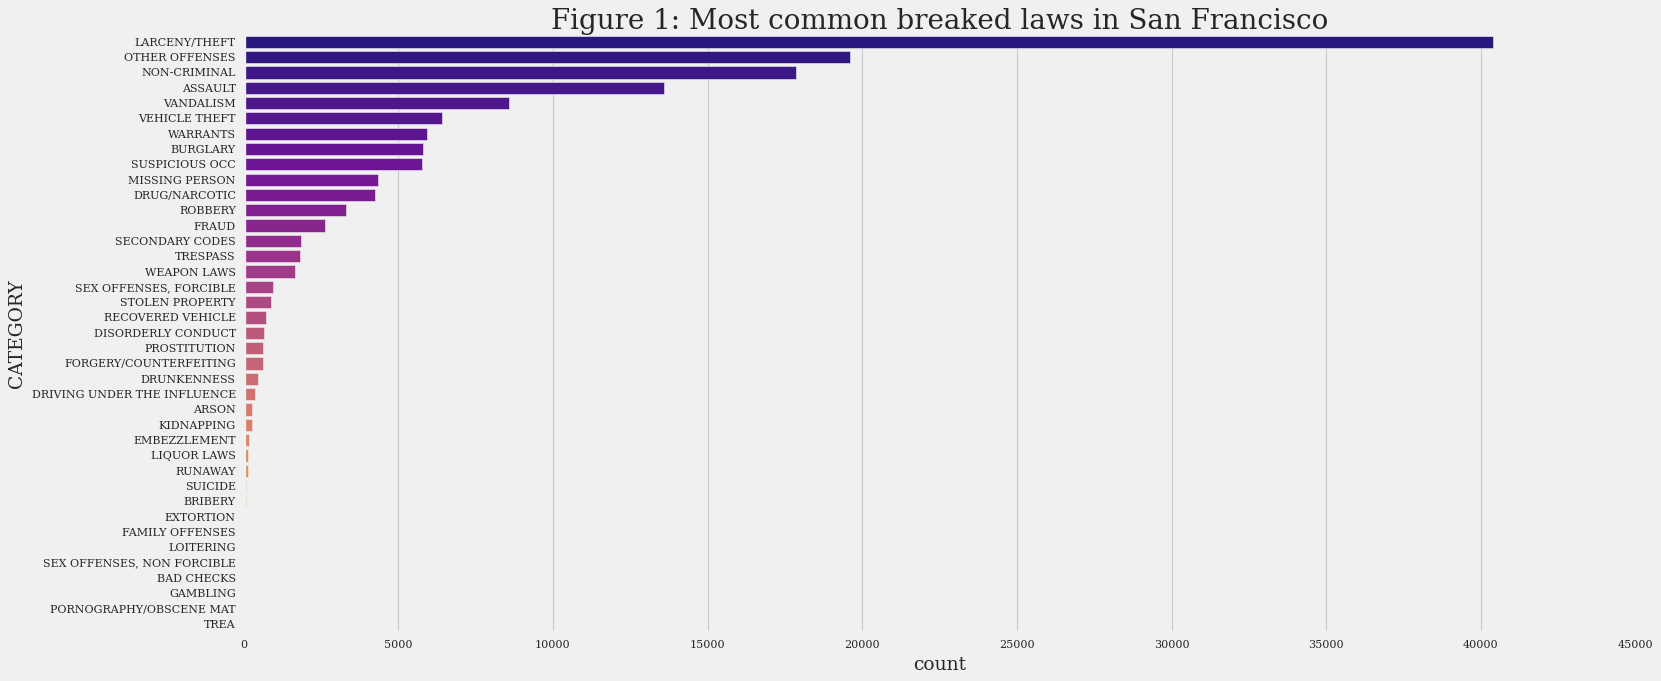

In [523]:
#some designing code to receiving understandable figure 
plt.rcParams['figure.figsize'] = (20,9)
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 15
plt.style.use('fivethirtyeight')
#counting number of crimes grouped by category of crime 
sns.countplot(y=data['CATEGORY'], palette = 'plasma',order=data['CATEGORY'].value_counts().index)
#title for fiure
plt.title('Figure 1: Most common breaked laws in San Francisco', fontweight = 40, fontsize =25)

plt.show()



As shown in Figure 1, the major crime categories are Larceny/Theft,Vandalism,Assault, while the minors are Gambling, Pornography/Obsence mat and Trea. According the graph the amount of incidents by Larceny is over 40000. It is comforting to know that non violent crime types are on the top of the rating.

#### Q2: Find District vs category of crime

Next, let’s look at the distribution of crimes over districts. I first built a crosstable to get the crime counts per one neighborhood of the city. After that, I normalized the counts and visualized them using a bar stacked bar chart from the matplotlib library:

In [399]:
#crosstab to find amount of crimes groupped by set of districts and category
plot_cd=pd.crosstab(data['CATEGORY'], data['DISTRICT'])
plot_cd.head()

DISTRICT,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
CATEGORY,,,,,,,,,,
ARSON,71,29,22,46,27,13,14,33,18,13
ASSAULT,1775,1187,1506,2110,1536,524,473,2352,918,1196
BAD CHECKS,4,3,2,2,4,2,5,6,6,0
BRIBERY,20,3,8,10,4,1,2,8,4,6
BURGLARY,521,645,534,793,803,413,395,842,695,161


In [400]:
#divide  the result of crosstab to find kind of frequency percent
plot_cd1=plot_cd.div(plot_cd.sum(axis=1),axis=0)*100
plot_cd1.head()

DISTRICT,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
CATEGORY,,,,,,,,,,
ARSON,24.825175,10.139860,7.692308,16.083916,9.440559,4.545455,4.895105,11.538462,6.293706,4.545455
ASSAULT,13.073580,8.742727,11.092288,15.540988,11.313250,3.859468,3.483833,17.323415,6.761435,8.809015
BAD CHECKS,11.764706,8.823529,5.882353,5.882353,11.764706,5.882353,14.705882,17.647059,17.647059,0.000000
BRIBERY,30.303030,4.545455,12.121212,15.151515,6.060606,1.515152,3.030303,12.121212,6.060606,9.090909
BURGLARY,8.979662,11.116856,9.203723,13.667701,13.840055,7.118235,6.807997,14.512237,11.978628,2.774905


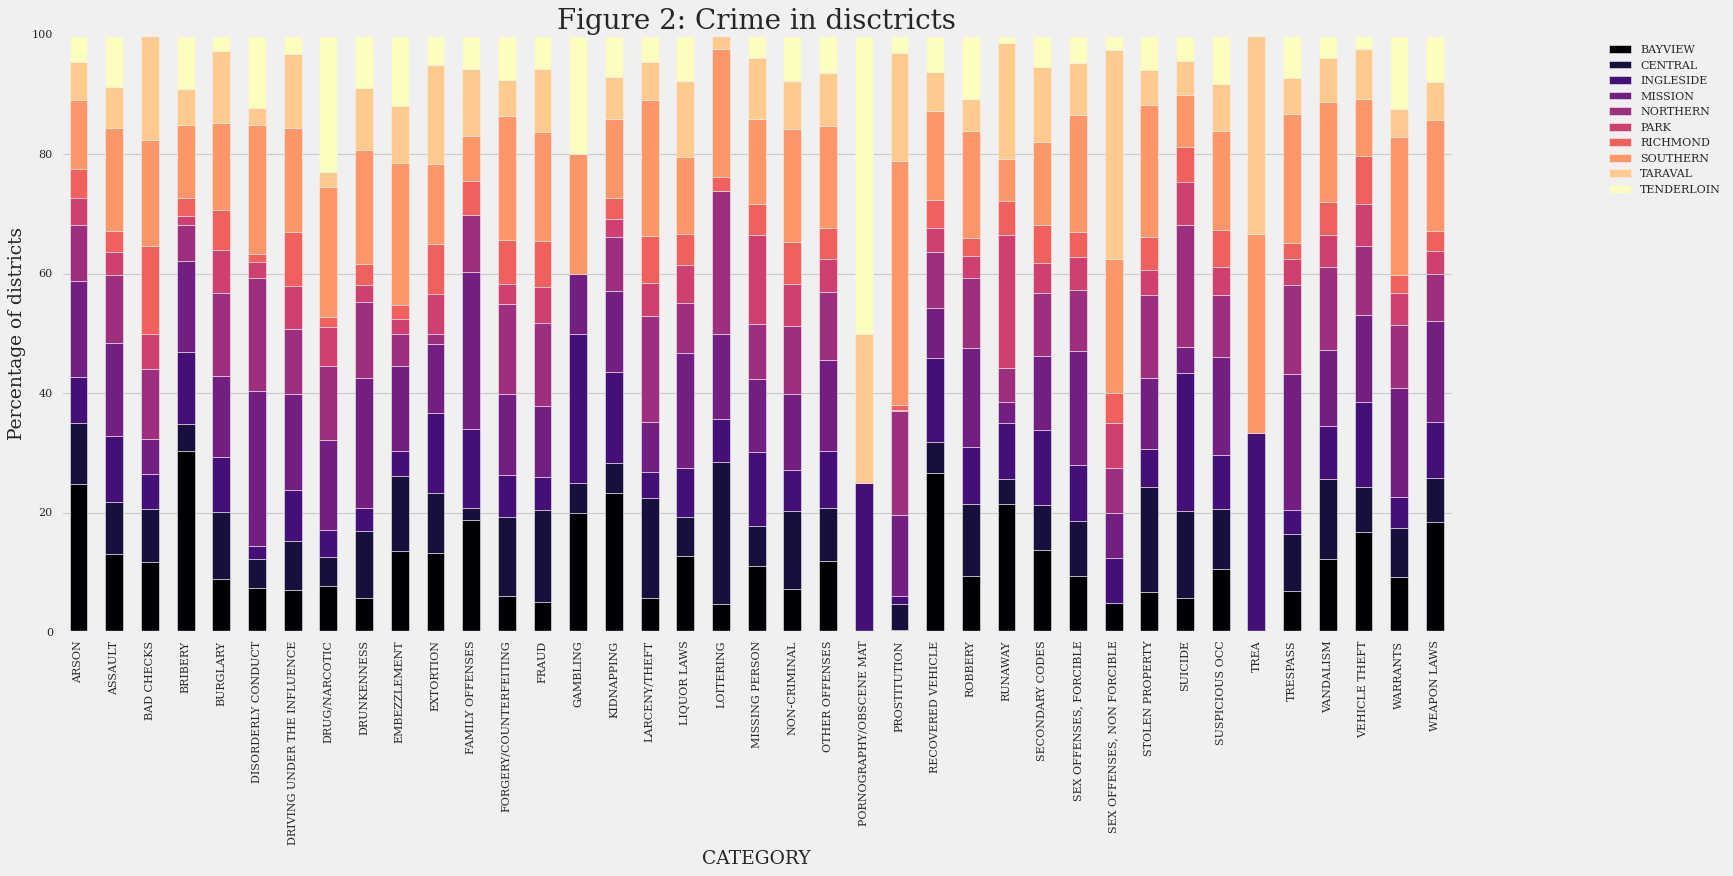

In [524]:
#plotting the graph with desigmed parameters
plot_cd1.plot(kind='bar',stacked=True, color = plt.cm.magma(np.linspace(0, 1, 10)))
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 15
plt.title('Figure 2: Crime in disctricts', fontweight = 40, fontsize =25)
plt.ylabel('Percentage of districts')
#legend is the box on the right side showing the district identification 
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.show()

From Figure 2 the following data have been obtained:

In Tenderloin district crime categories,such Drug/Narcotic,Gambling and Pornography/Obsence mat,

In Taraval district crime categories, such non forcible Sex offences and Trea,

In Southern district crime categories, such Prostitution, Trea, Embezzlement, Warrants and so on,

In Northern district crime categories, such Disorderly conduct,Family offences and Lottering,

In Bayview district crime categories, such Arson,Bribery,Kidnapping, Recovered vehicle, 

are wide-spreaded groups of crime in city of Sanfrancisco.
    

####  Q5: Find Distribution of crime over the day/week

On this stage, I will try to find out distibution of crime per hours. To do that It is important to count values on each time from dataframe and group them by time.

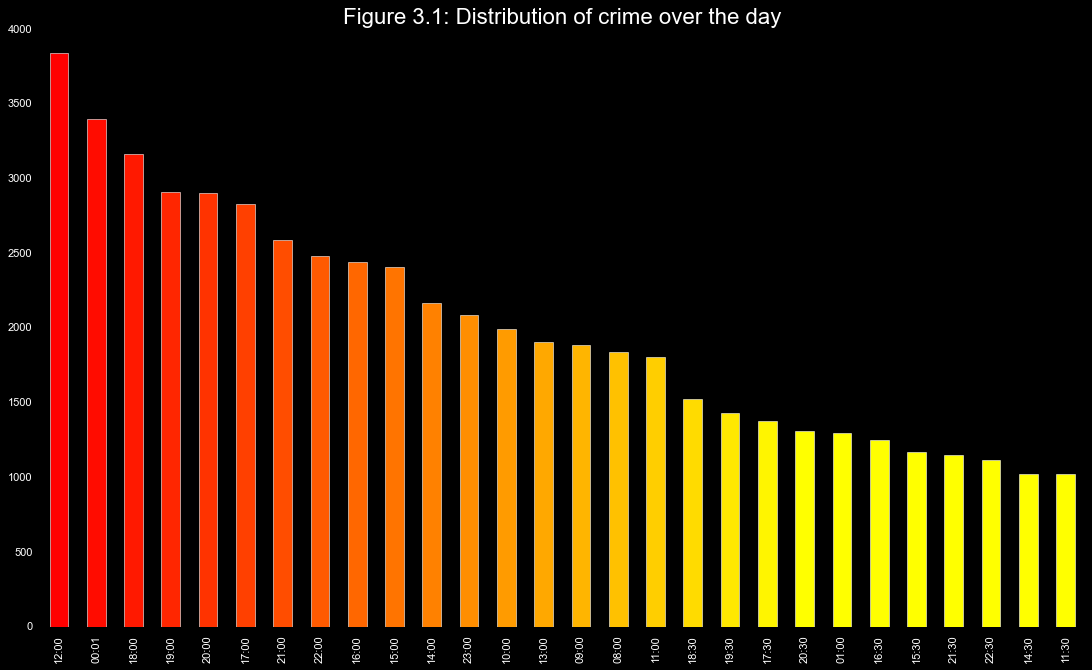

In [527]:
#count number of crime in one day separated as hours
plot_dd=data['TIME'].value_counts().head(28)
plt.style.use('dark_background')
color = plt.cm.autumn(np.linspace(0, 5, 100))
#ploting the graph for distibution over the day
plot_dd.plot.bar(color = color, figsize = (15, 9))
plt.title('Figure 5.1: Distribution of crime over the day', fontsize = 20)
plt.show()




As Figure 3.1 represents,the time when most of law-breakings are commited is night time. Especially, the midnight is most dangerous part of the day. The number of crimes occurring during the day/morning is much less. However, the it does not mean that daytime crime rate is satisfactory little.

The next step is to identify crime distribution over week day. In order to visualize the question,firstly,I create separate data about week days and amount of law-breakings occured on this weekday and then I use some functions to plot the graphs from seaborn library.

In [492]:
#creating data for distibution of crime over a week
t = data['DAY OF WEEK'].value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

table = table.reset_index()
table.rename({'index': 'Week day'}, axis='columns', inplace=True)

table


,Week day,Count
0,Monday,20779
1,Tuesday,21241
2,Wednesday,21329
3,Thursday,21393
4,Friday,23370
5,Saturday,22170
6,Sunday,20203


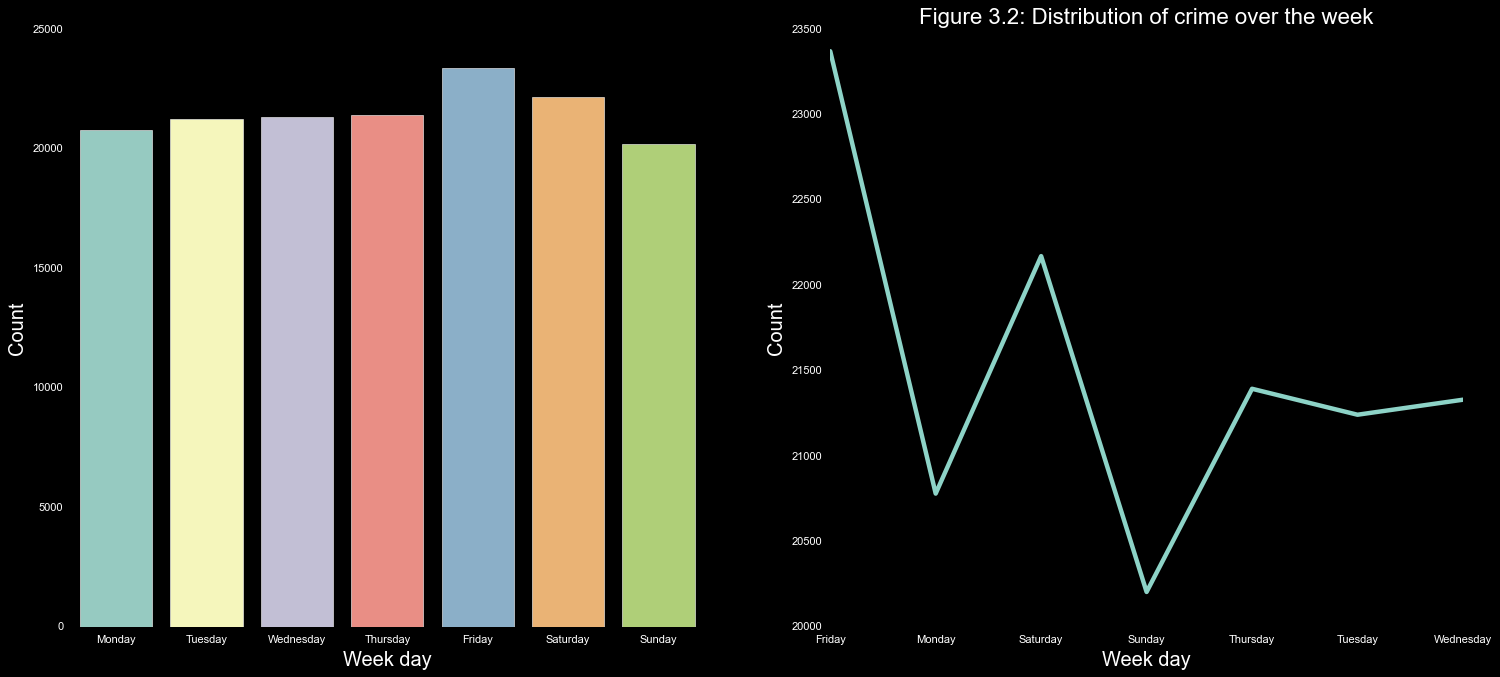

In [542]:
#ploting two graphs in one figure
fig, axs = plt.subplots(ncols=2)
sns.barplot(data=table,x = 'Week day' , y = 'Count' ,ax=axs[0])
sns.lineplot(data=table,x = 'Week day' , y = 'Count' ,ax=axs[1])
plt.title('Figure 5.2: Distribution of crime over the week', fontsize = 20)
plt.show()

As the graph above illustrates, most crimes happen during the weekend when people go out. Some other crimes are more often registered during weekdays which might be associated with police working hours.But the range of crimes commited on weekends and workdays is not so great.

#### Q6: Identify crime rate in each month

Next step is visualize crime rate in terms of months as pie chart. Let's first count crime number in each month ordered by amount of crime descendingly:

In [440]:
#select month from date typed date column
data['DATE'].dt.month.value_counts()

10    13329
1     12944
12    12925
5     12712
11    12670
9     12473
8     12427
3     12359
4     12316
7     12164
2     12090
6     12076
Name: DATE, dtype: int64

The following code is used to replace order number of months with their names. Also it highlightes the months with most crime rate. Then ploting a pie chart with percentage.

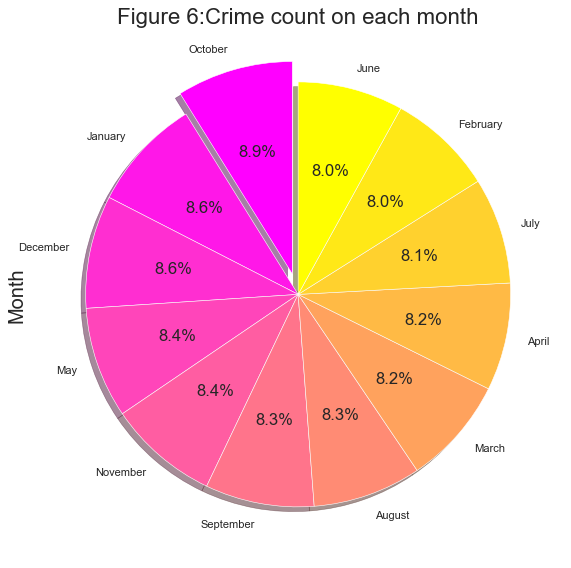

In [544]:
plt.style.use('seaborn-darkgrid')
color = plt.cm.spring(np.linspace(0, 1, 12))
labels = 'October', 'January', 'December', 'May','November','September','August','March','April','July','February','June'
data['Month'] = data['DATE'].dt.month
data['Month'].value_counts().plot.pie(
    
figsize = (15, 8), explode = (0.1, 0,0,0,0,0,0,0,0,0,0,0),
    labels=labels, colors=color,autopct='%1.1f%%',
        shadow=True, startangle=90
)

plt.title('Figure 6:Crime count on each month',fontsize = 20)

plt.xticks(rotation = 90)

plt.show()







As the figure 6 presents, there is no significant difference between crime rates distributed over month.Month with most and least crime percentage is October and June,respectievly.The extension of percentage is 0.9%. So we can say that crime rate is not so much depend on the months.